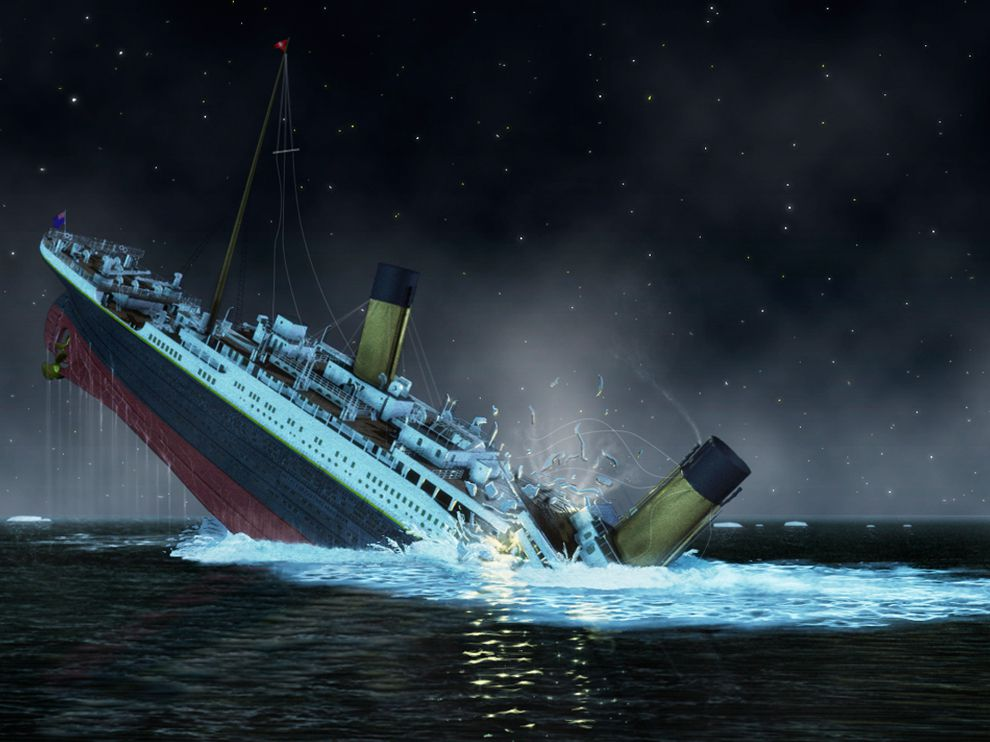
____

## `Project Overview`
____
In this project, I investigate the Titanic Dataset with the use of the Python libraries Sklearn, NumPy, Pandas, Matplotlib and Seaborn.

### Dataset Information/ Data Dictionary/Variable Notes
____
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic

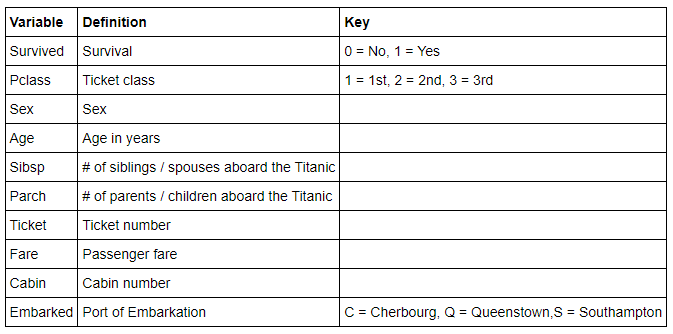

**Pclass**:  A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**Sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**Parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### Initial Questions & Data Investigation
_____
- Did the Port of Embarkation affect the chances of surviving?.
- Did the Pclass affect the chances of surviving?.
- How did the other factors influence this?
- Did Age effect the chances of surviving?

In [1]:
# # Install the Kaggle library
# ! pip install kaggle

In [2]:
# from google.colab import files
# files.upload()                     # upload [kaggle.json]

In [3]:
# # Make a folder named “.kaggle”
# ! mkdir ~/.kaggle

In [4]:
# # Copy the “kaggle.json” into this new directory
# ! cp kaggle.json ~/.kaggle/

In [5]:
# # Allocate the required permission for this file.
# ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# # Allocate the required permission for this file.
# ! chmod 600 ~/.kaggle/kaggle.json

In [7]:
# ! kaggle competitions download -c titanic

In [8]:
# ! unzip titanic.zip

## `1. Data Acquisition`
- The Python Pandas packages helps us work with our datasets. We start by acquiring the training dataset into Pandas DataFrames, and take a first look of our Dataframe using pandas descriptive statitstics functions

### Importing Necessary libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df= pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## `2. Exploratory Data Analysis [ EDA ]`

In [11]:
df.shape

(891, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


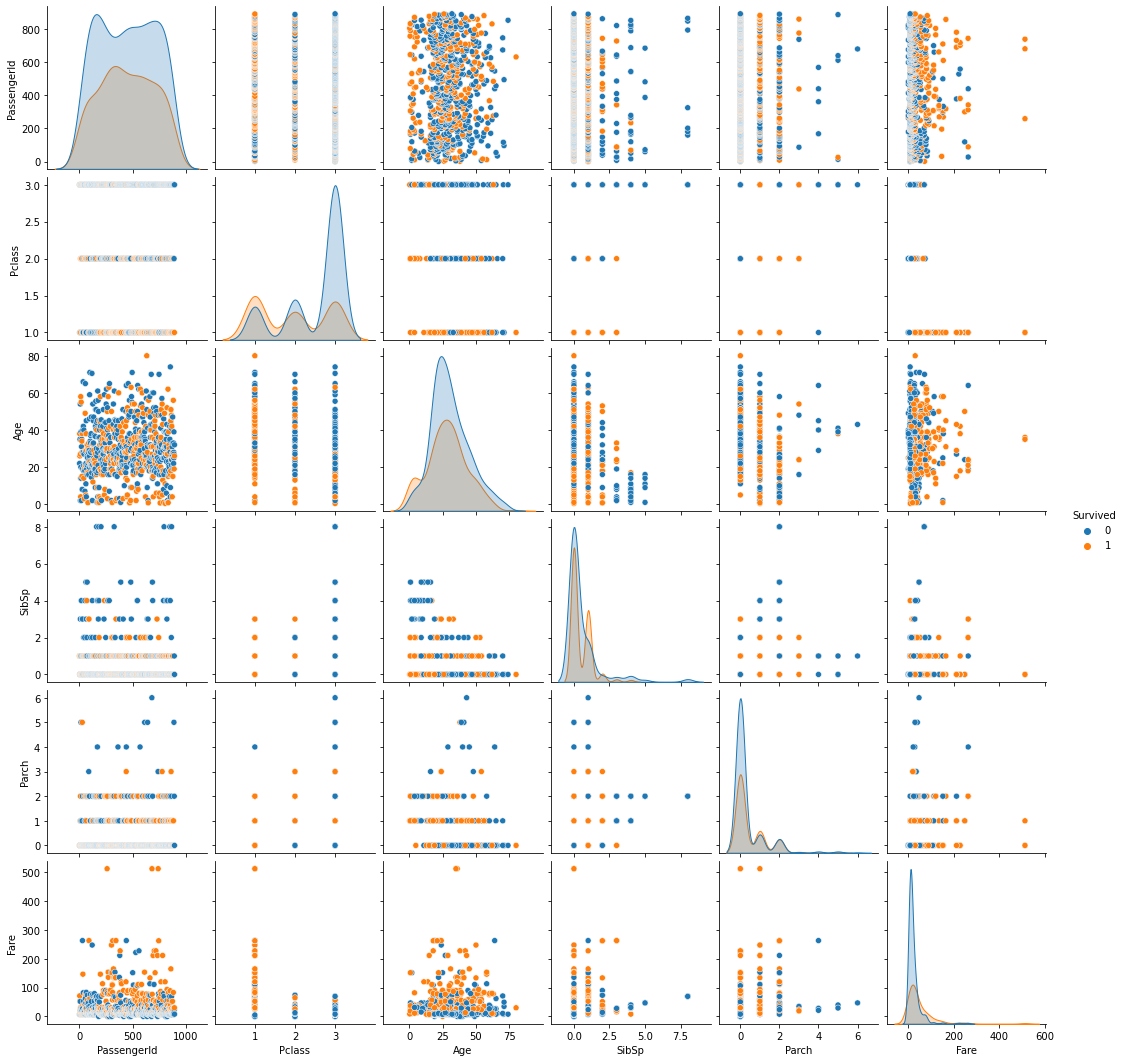

In [14]:
# To check correlation between each feature with target feature:
sns.pairplot(data=df, hue='Survived')

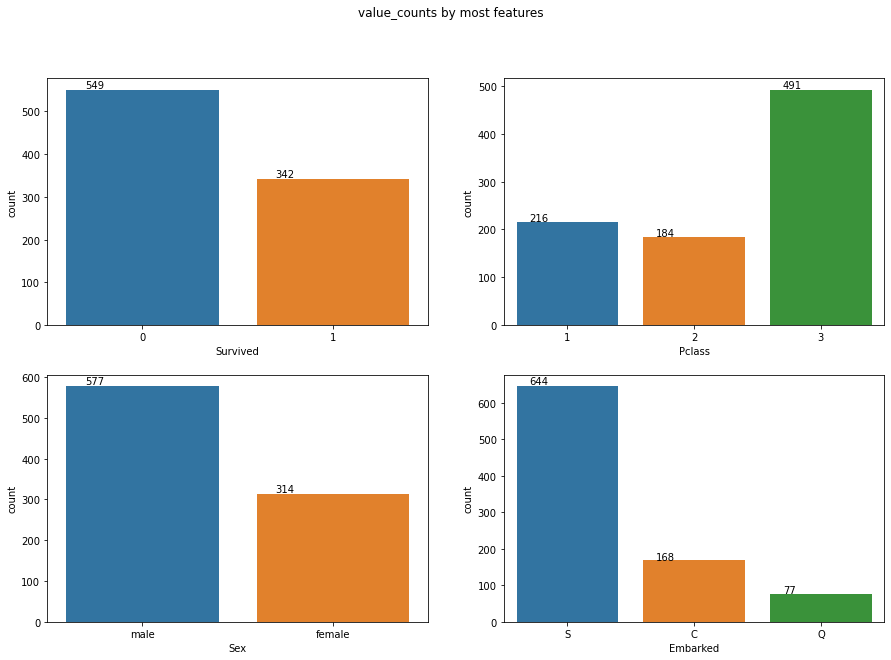

In [15]:
# plot countplot for some features, to examine their classes:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

fig.suptitle('value_counts by most features ')

ax1= sns.countplot(ax=axes[0, 0], data=df, x='Survived')
for p in ax1.patches:
    ax1.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax2= sns.countplot(ax=axes[0, 1], data=df, x='Pclass')
for p in ax2.patches:
    ax2.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax3= sns.countplot(ax=axes[1, 0], data=df, x='Sex')
for p in ax3.patches:
    ax3.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

ax4= sns.countplot(ax=axes[1, 1], data=df, x='Embarked')
for p in ax4.patches:
    ax4.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

    
plt.show()


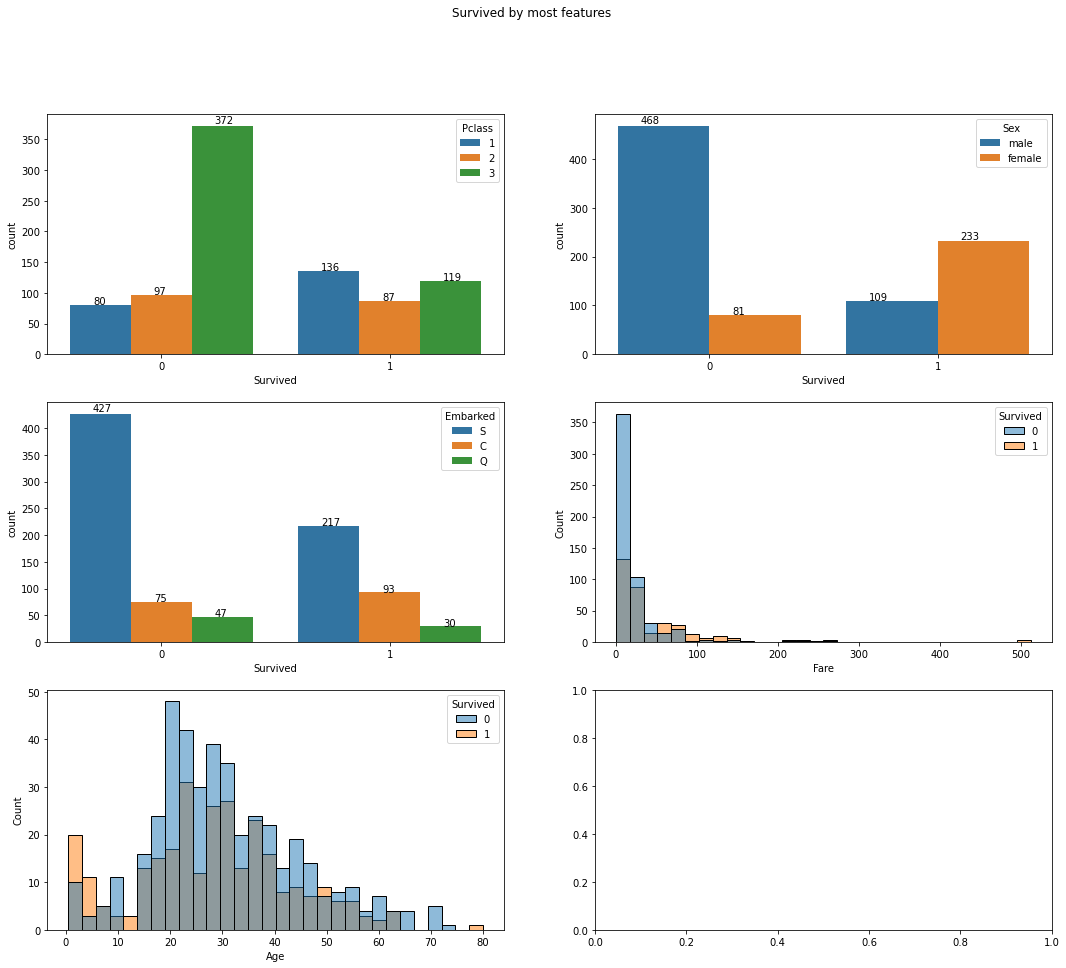

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(18,15))

fig.suptitle('Survived by most features ')

ax1= sns.countplot(ax=axes[0, 0], data=df, x='Survived', hue='Pclass')
for p in ax1.patches:
    ax1.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax2= sns.countplot(ax=axes[0, 1], data=df, x='Survived', hue='Sex')
for p in ax2.patches:
    ax2.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax3= sns.countplot(ax=axes[1, 0], data=df, x='Survived', hue='Embarked')
for p in ax3.patches:
    ax3.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

ax4= sns.histplot(ax=axes[1, 1], data=df, x='Fare', hue='Survived', bins= 30)
ax5= sns.histplot(ax=axes[2, 0], data=df, x='Age', hue='Survived', bins= 30)

plt.show()


### Correlation of Embarked with Pclass.

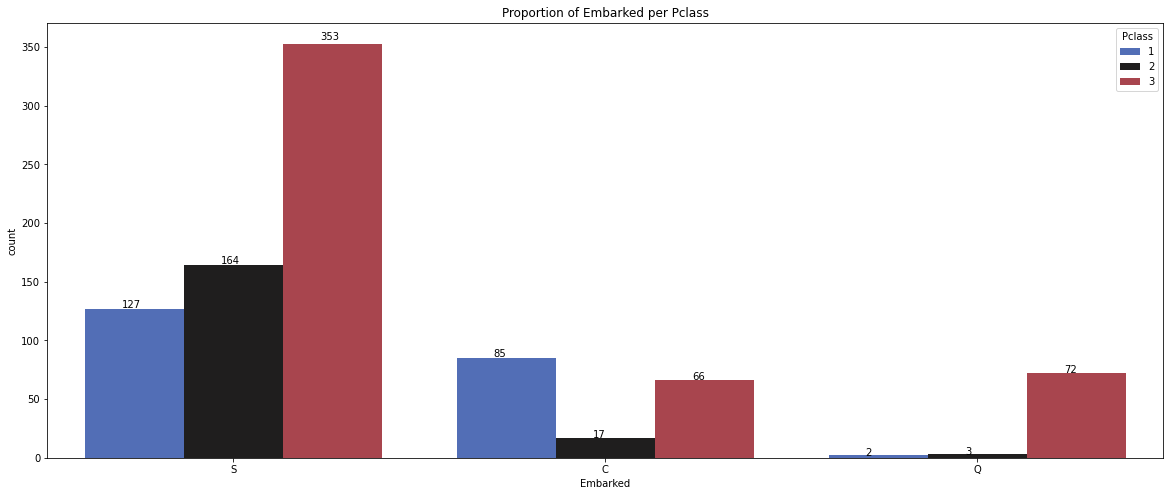

In [17]:
plt.figure(figsize= [20, 8])
ax3= sns.countplot(data=df, x='Embarked', hue='Pclass', palette="icefire")
for p in ax3.patches:
    ax3.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))
    
ax3.set_title('Proportion of Embarked per Pclass')
plt.show()

### EDA Findings
- #### Non-Survivor trends:
    -  3rd Class (Pclass=3)
    -  Male
    -  Low Fare price
    -  people with ages ranging from 15 to 75 years, but children less than 15 and old men more than 75 are survived
    
- #### General Trends:
    -  Majority of passengers have No Sibling/Spouse or Parents onboard
    -  Southhampton is the most popular embarked location
    -  Most 3rd class passengers embarked from Southhampton
    -  Almost no 1st class passengers embarked from Queensland
    -  3rd class is almost half the distribution of passengers
    -  Majority of ticket cost fall between 0-100 dollars
    -  Age is somewhat normally distributed, with a large number of children under 5 years old

## `3. Data Cleaning`

In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Here as shown the [Cabin feature] has +70% null values so we will drop all column,
# and will fill null values of [Age feature] with median of Age column, because there are no alot of null values in it and i don't want to lose that feature due to its importance.
# and will drop nan in [Embarked feature] because it only has 2 nan values

df.drop(['Cabin'], axis= 1, inplace= True)
df['Age'].fillna(df['Age'].median(), inplace= True)
df.dropna(subset= ['Embarked'], inplace= True)

# then check nulls again:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
df.shape          # 891 - 2 nan = 889

(889, 11)

## `4. Feature Selection & Engineering`

In [21]:
# I will drop the [PassengerId, Ticket] features because they don't add value to the modeling:
df.drop(['PassengerId', 'Ticket'], axis= 1, inplace= True)

In [22]:
# Here i will combine the 2 features [SibSp] & ['Parch'],
# the ['SibSp'] feature mean --->  number of siblings/spouses aboard the Titanic
# the ['Parch'] feature mean --->  number of parents/children aboard the Titanic

df['nums_of_family']= df['SibSp'] + df['Parch']

# then drob this two features:
df.drop(['SibSp', 'Parch'], axis= 1, inplace= True)

In [23]:
# create is_alone column from nums_of_family column:

df['is_alone'] = 1
df['is_alone'].loc[(df['nums_of_family'] > 0)] = 0

C:\Users\nooor\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [24]:
# create Title column from splitting data in Name column:

titles = []
for s in df['Name']:
    id1 = s.index(",")
    id2 = s.index(".")
    res = s[id1 + len("") + 1: id2]
    titles.append(res)
    
df['Title'] = titles
df['Title'] = df['Title'].str.strip()

df.drop(['Name'], axis= 1, inplace= True)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [25]:
replacement_dic = {
        'Mlle':'Miss',
        'Mme':'Miss', 
        'Master':'Other',
        'Don':'Other',
        'Rev':'Other',
        'Major':'Other',
        'Lady':'Other',
        'Sir':'Other',
        'Col':'Other', 
        'Capt':'Other',
        'the Countess':'Other',
        'Jonkheer':'Other' }

df['Title'] = df['Title'].replace(replacement_dic)

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'nums_of_family', 'is_alone', 'Title'],
      dtype='object')

### count and drop duplicates

In [27]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.reset_index(drop= True, inplace= True)

110


In [28]:
# show data after cleaning and feature selection & engineering:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,nums_of_family,is_alone,Title
0,0,3,male,22.0,7.2500,S,1,0,Mr
1,1,1,female,38.0,71.2833,C,1,0,Mrs
2,1,3,female,26.0,7.9250,S,0,1,Miss
3,1,1,female,35.0,53.1000,S,1,0,Mrs
4,0,3,male,35.0,8.0500,S,0,1,Mr
...,...,...,...,...,...,...,...,...,...
774,0,2,male,27.0,13.0000,S,0,1,Other
775,1,1,female,19.0,30.0000,S,0,1,Miss
776,0,3,female,28.0,23.4500,S,3,0,Miss
777,1,1,male,26.0,30.0000,C,0,1,Mr


In [29]:
len(df)          # 889 - 110 = 779

779

## `5. Data Resampling`

### Countplot of target variable to examine the parity of the classes:

In [30]:
df['Survived'].value_counts()

0    458
1    321
Name: Survived, dtype: int64

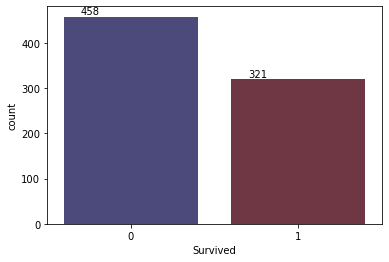

In [31]:
plt.figure()
ax = sns.countplot(x= df['Survived'], palette="icefire")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

plt.show()

In [32]:
# sampling:
df=df.groupby('Survived').sample(321,random_state=42)
df=df.sort_index()
df.reset_index(drop= True, inplace= True)
df.shape

(642, 9)

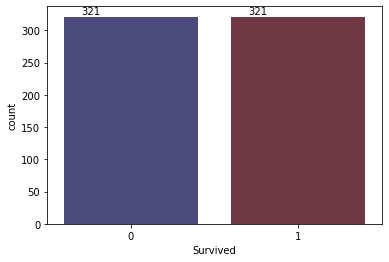

In [33]:
plt.figure()
ax = sns.countplot(x= df['Survived'], palette="icefire")

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+.1, p.get_height()+0.01*p.get_height()))

plt.show()

## `6. Data Preprocessing`

In [34]:
data= df.iloc[:, 1:]
label_data= df.iloc[:, 0]

In [35]:
data.shape

(642, 8)

In [36]:
data.describe()

,Pclass,Age,Fare,nums_of_family,is_alone
count,642.000000,642.000000,642.000000,642.000000,642.000000
mean,2.191589,29.599564,36.768218,0.922118,0.562305
std,0.863034,13.865974,55.374135,1.494716,0.496490
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,8.050000,0.000000,0.000000
50%,2.000000,28.000000,16.100000,0.000000,1.000000
75%,3.000000,36.000000,36.940650,1.000000,1.000000
max,3.000000,80.000000,512.329200,10.000000,1.000000


In [37]:
data.dtypes

Pclass              int64
Sex                object
Age               float64
Fare              float64
Embarked           object
nums_of_family      int64
is_alone            int64
Title              object
dtype: object

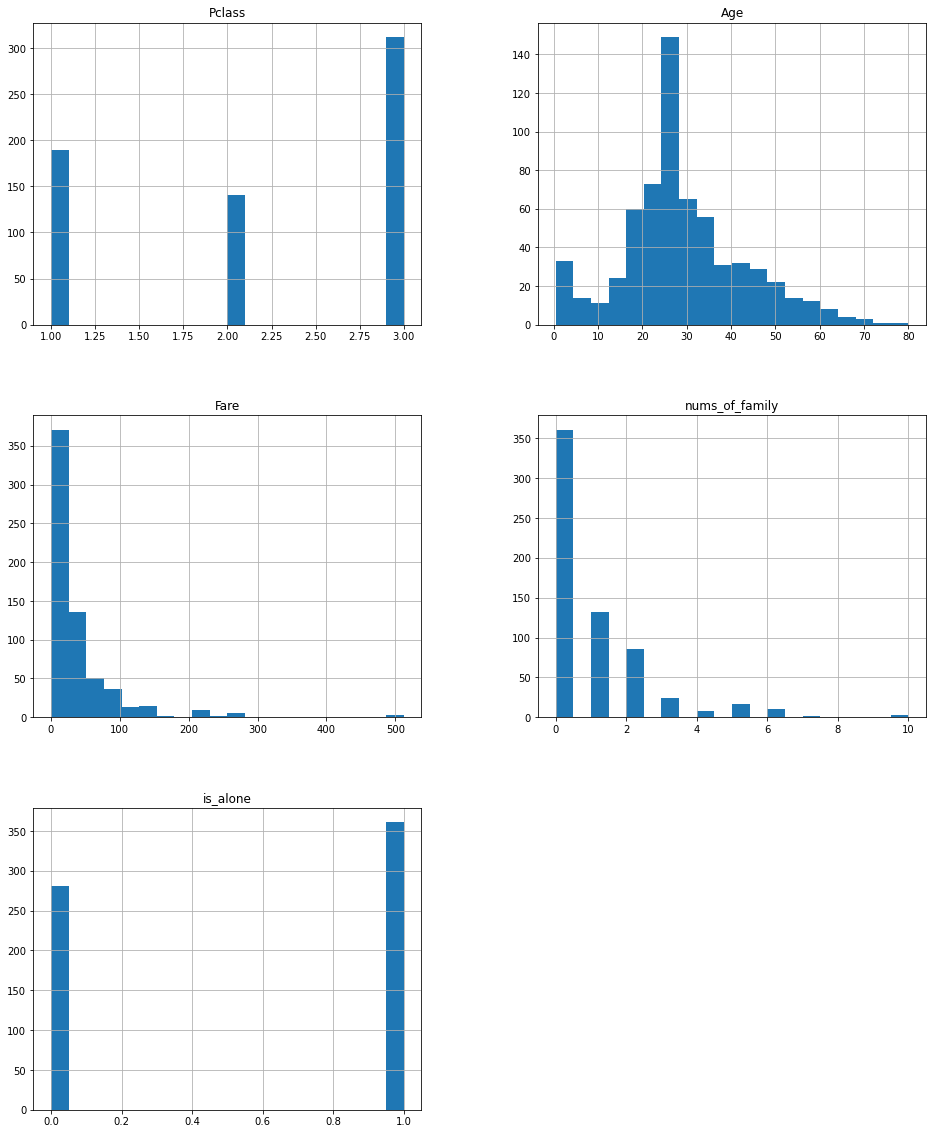

In [38]:
data.hist(figsize=(16, 20), bins=20)            # plot the destribution of numerical features only.
plt.show()

In [39]:
data.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'nums_of_family',
       'is_alone', 'Title'],
      dtype='object')

In [40]:
data.skew()

<ipython-input-40-b3b431164adb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Pclass           -0.379610
Age               0.423410
Fare              4.418222
nums_of_family    2.512232
is_alone         -0.251768
dtype: float64

####  check the distribution (with skewness)
- if [ skewness > 1 ] -- such as [ wheelbase, compressionratio, horsepower, price ] are [ 'highly positively skewed' ]
- if [ skewness < -1 ] are [ 'highly negatively skewed' ]
- if [ 0.5 < skewness < 1 ] -- such as [ carwidth, curbweight, citympg ] are [ 'moderately positively skewed' ]
- if [ -0.5 < skewness < -1 ] -- such as [ stroke ] are [ 'moderately negatively skewed' ]
- if [ -0.5 < skewness < 0.5 ] -- such as [ symboling, carlength, carheight, boreration, peakrpm, highwaympg ] are [ 'normally distributed' ]

In [41]:
numerical_cols= [c for c in data.columns if data[c].dtypes != 'O']
skews_of_numerical_cols= [data[c].skew() for c in numerical_cols]

result = list(zip(numerical_cols, skews_of_numerical_cols))

In [42]:
result

[('Pclass', -0.3796102562255277),
 ('Age', 0.4234101785412658),
 ('Fare', 4.418222488125947),
 ('nums_of_family', 2.5122315770315566),
 ('is_alone', -0.2517675657580087)]

In [43]:
distributed_features= []

for i, j in result:
    if j > -0.5 and j < 0.5:
        distributed_features.append(i)

distributed_features

['Pclass', 'Age', 'is_alone']

In [44]:
skewed_features = [x for x in numerical_cols if x not in distributed_features]
skewed_features           # i want transform the distribution of this features

['Fare', 'nums_of_family']

### Data Transformation
1. #### Transform skewed data to be (normally distributed)
2. #### Standardize data

In [45]:
# This piece of code is special case, which here i convert any zero values in this ['SibSp', 'Parch', 'Fare'] to epsilon which is very very small value to be able to run the next code which is boxcox transformation because is very sensitive to zeros values. 

data['nums_of_family'].replace(0, 0.00000001, inplace= True)
data['Fare'].replace(0.0, 0.00000001, inplace= True)

Lambda value used for Transformation: 0.21362611278575988
Lambda value used for Transformation: -0.04021854496804425


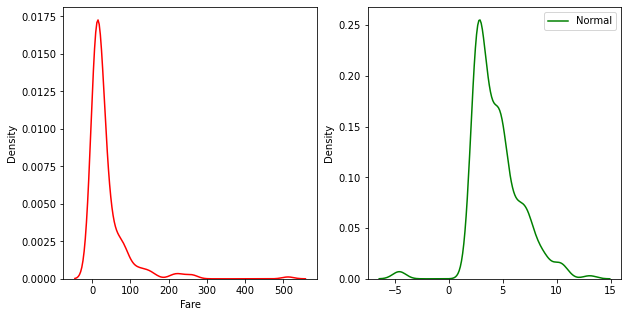

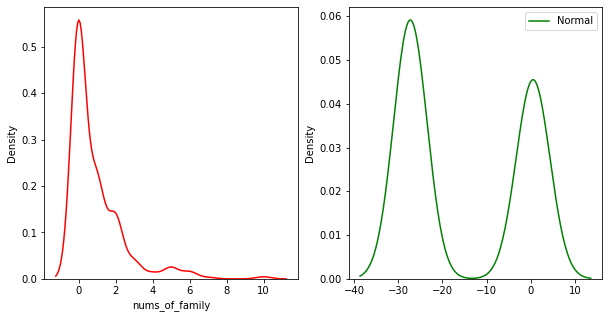

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

for i in skewed_features:
    
    original_data = data[i]

    # transform training data & save lambda value
    fitted_data, fitted_lambda = stats.boxcox(original_data)

    # creating axes to draw plots
    fig, ax = plt.subplots(1, 2)

    # plotting the original data(non-normal) and 
    # fitted data (normal)
    sns.kdeplot(original_data, label = "Non-Normal", color ="red", ax = ax[0])

    sns.kdeplot(fitted_data, label = "Normal", color ="green", ax = ax[1])

    # adding legends to the subplots
    plt.legend(loc = "upper right")

    # rescaling the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)

    print(f"Lambda value used for Transformation: {fitted_lambda}")
    data[i] = fitted_data          # save changes to dataframe after transformation

In [47]:
data[skewed_features]

,Fare,nums_of_family
0,2.466131,0.000000
1,6.965339,0.000000
2,2.603351,-27.293978
3,6.255237,0.000000
4,2.705405,-27.293978
...,...,...
637,3.054602,-27.293978
638,3.415718,-27.293978
639,4.999414,-27.293978
640,4.503180,1.074695


### Checking after transform data to normal distribution

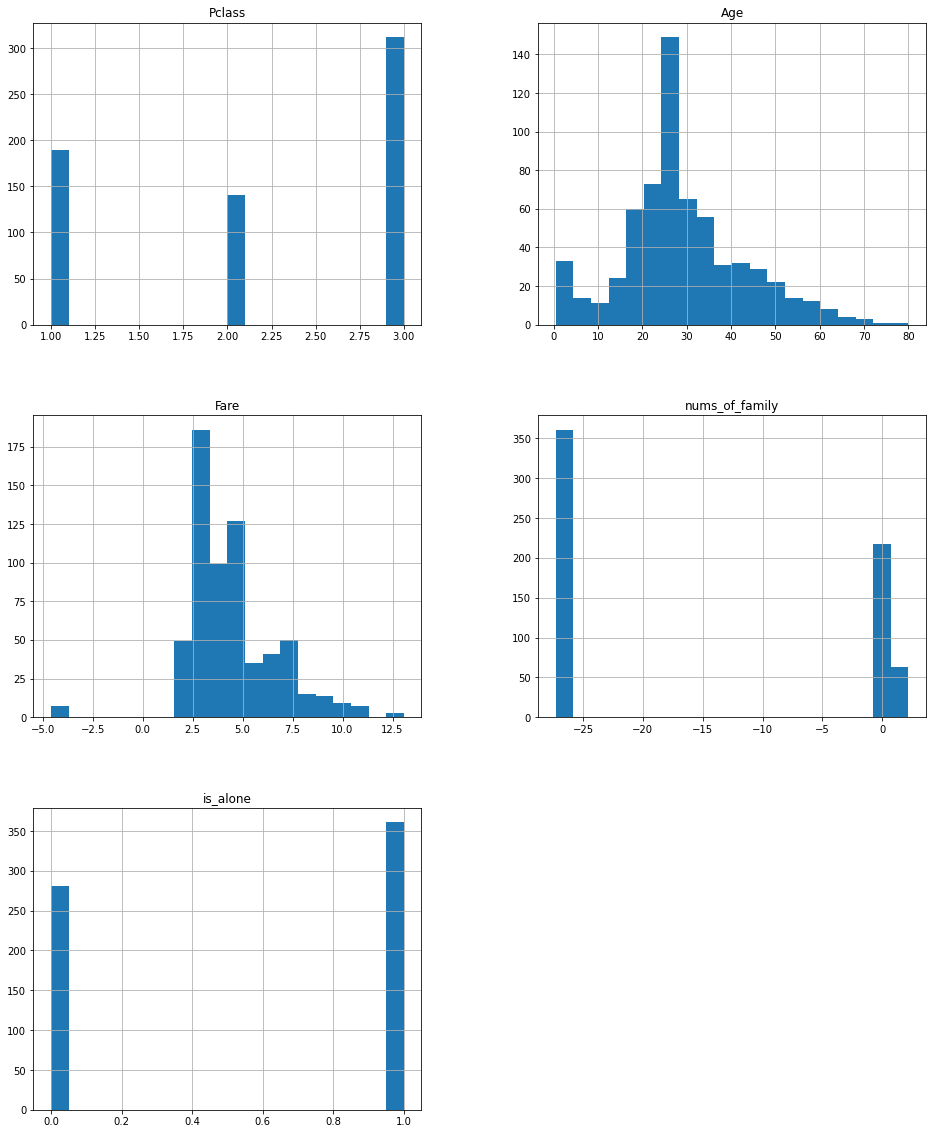

In [48]:
data.hist(figsize=(16, 20), bins=20)            # he will plot the destribution of numerical features only.
plt.show()

### check for unique values in categorical variables

In [49]:
data.dtypes

Pclass              int64
Sex                object
Age               float64
Fare              float64
Embarked           object
nums_of_family    float64
is_alone            int64
Title              object
dtype: object

In [50]:
object_cols= [c for c in data.columns if data[c].dtypes == 'O']
for col in object_cols:
    if data[col].dtype=='object':
        print(f'column name is "{col}" \n', data[col].unique())
        print('==='*15)          # [Embarked] feature is the names of Port of Embarkation [C = Cherbourg, Q = Queenstown,S = Southampton]

column name is "Sex" 
 ['male' 'female']
column name is "Embarked" 
 ['S' 'C' 'Q']
column name is "Title" 
 ['Mr' 'Mrs' 'Miss' 'Other' 'Dr' 'Ms']


### Encoding categorical variables using (one hot Encoding) 

In [51]:
# one hot encoding :
data_onehot = pd.get_dummies(data= data, columns= ['Sex', 'Embarked', 'Title'])
data_onehot.head()

,Pclass,Age,Fare,nums_of_family,is_alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Other
0,3,22.0,2.466131,0.000000,0,0,1,0,0,1,0,0,1,0,0,0
1,1,38.0,6.965339,0.000000,0,1,0,1,0,0,0,0,0,1,0,0
2,3,26.0,2.603351,-27.293978,1,1,0,0,0,1,0,1,0,0,0,0
3,1,35.0,6.255237,0.000000,0,1,0,0,0,1,0,0,0,1,0,0
4,3,28.0,2.705405,-27.293978,1,0,1,0,1,0,0,0,1,0,0,0


In [52]:
data_onehot.shape

(642, 16)

In [53]:
data_onehot.dtypes

Pclass              int64
Age               float64
Fare              float64
nums_of_family    float64
is_alone            int64
Sex_female          uint8
Sex_male            uint8
Embarked_C          uint8
Embarked_Q          uint8
Embarked_S          uint8
Title_Dr            uint8
Title_Miss          uint8
Title_Mr            uint8
Title_Mrs           uint8
Title_Ms            uint8
Title_Other         uint8
dtype: object

### Data Standardization

In [54]:
from sklearn.preprocessing import StandardScaler

uint8_columns= [c for c in data_onehot.columns if data_onehot[c].dtypes == 'uint8']
numerical_features= data_onehot.drop(uint8_columns, axis= 1)      # numerical features without uint8.

scaler = StandardScaler()
data_onehot[numerical_features.columns] = scaler.fit_transform(data_onehot[numerical_features.columns])
scaled_data= pd.concat([data_onehot[numerical_features.columns], data_onehot[uint8_columns]], axis= 1)
scaled_data.head()

,Pclass,Age,Fare,nums_of_family,is_alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Other
0,0.937439,-0.548500,-0.861035,1.094877,-1.133445,0,1,0,0,1,0,0,1,0,0,0
1,-1.381774,0.606303,1.130839,1.094877,-1.133445,1,0,1,0,0,0,0,0,1,0,0
2,0.937439,-0.259799,-0.800285,-0.881924,0.882266,1,0,0,0,1,0,1,0,0,0,0
3,-1.381774,0.389778,0.816465,1.094877,-1.133445,1,0,0,0,1,0,0,0,1,0,0
4,0.937439,-0.115449,-0.755104,-0.881924,0.882266,0,1,0,1,0,0,0,1,0,0,0


### Convert [ uint8 ] variables datatypes to [ int ]

In [55]:
Columns= scaled_data.columns

for c in Columns:
    if scaled_data[c].dtype == 'uint8':
        scaled_data[c]= scaled_data[c].astype('int64')
        
scaled_data.dtypes

Pclass            float64
Age               float64
Fare              float64
nums_of_family    float64
is_alone          float64
Sex_female          int64
Sex_male            int64
Embarked_C          int64
Embarked_Q          int64
Embarked_S          int64
Title_Dr            int64
Title_Miss          int64
Title_Mr            int64
Title_Mrs           int64
Title_Ms            int64
Title_Other         int64
dtype: object

In [56]:
scaled_data.describe()

,Pclass,Age,Fare,nums_of_family,is_alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Other
count,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,1.120599e-16,2.209205e-16,3.268414e-17,9.684188e-17,-6.139084e-17,0.420561,0.579439,0.216511,0.071651,0.711838,0.010903,0.236760,0.498442,0.177570,0.001558,0.074766
std,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,0.494034,0.494034,0.412188,0.258110,0.453260,0.103930,0.425425,0.500387,0.382448,0.039467,0.263219
min,-1.381774e+00,-2.106041e+00,-3.984721e+00,-8.819242e-01,-1.133445e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.381774e+00,-5.485002e-01,-7.894856e-01,-8.819242e-01,-1.133445e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.221676e-01,-1.154489e-01,-2.730650e-01,-8.819242e-01,8.822660e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.374388e-01,4.619529e-01,4.553251e-01,1.094877e+00,8.822660e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,9.374388e-01,3.637663e+00,3.832595e+00,1.254156e+00,8.822660e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Study the Correlation

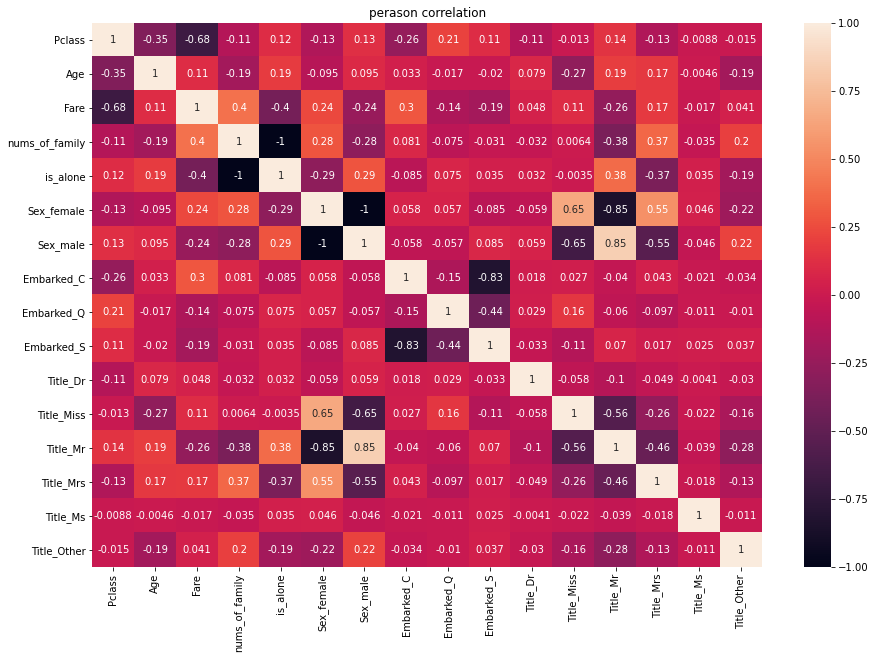

In [57]:
plt.figure(figsize=(15, 10))
sns.heatmap(scaled_data.corr(), annot=True, cbar=True)         ## Linear correlation
plt.title('perason correlation');

### Dimensionality Reduction using (PCA)

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95) # يعني تبقي مختلفه عن بعض بنسبه 0.95 (components) الناتجه او ال features انا هنا كدا بقوله انا عايز ال
scaled_data = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_ 

array([0.38831096, 0.25110962, 0.12074933, 0.09592401, 0.05039461,
       0.03821478, 0.02405215])

In [59]:
PCA_DF= pd.DataFrame(scaled_data)
PCA_DF

,0,1,2,3,4,5,6
0,-0.360270,-1.778718,-1.206924,-0.532347,0.184378,0.147697,-0.230160
1,-2.515570,1.033345,-0.037151,0.524289,-0.644782,0.604736,0.601647
2,1.389821,-0.652961,0.933409,1.136385,0.180003,-0.290958,-0.315397
3,-2.290309,0.673450,-0.149600,0.596079,0.704758,0.351885,0.491824
4,1.826733,-0.369534,-0.139717,-0.283867,-0.753603,-0.094375,-0.064164
...,...,...,...,...,...,...,...
637,1.430772,0.366686,0.034376,-0.557991,0.466101,0.264812,0.070761
638,1.169687,0.295242,0.366343,-0.345888,0.560389,0.293927,0.119631
639,0.196253,0.860934,1.995271,0.219429,0.840748,0.434622,-0.272542
640,-1.258848,-1.373473,-0.164266,0.932843,0.051025,-0.547786,-0.676959


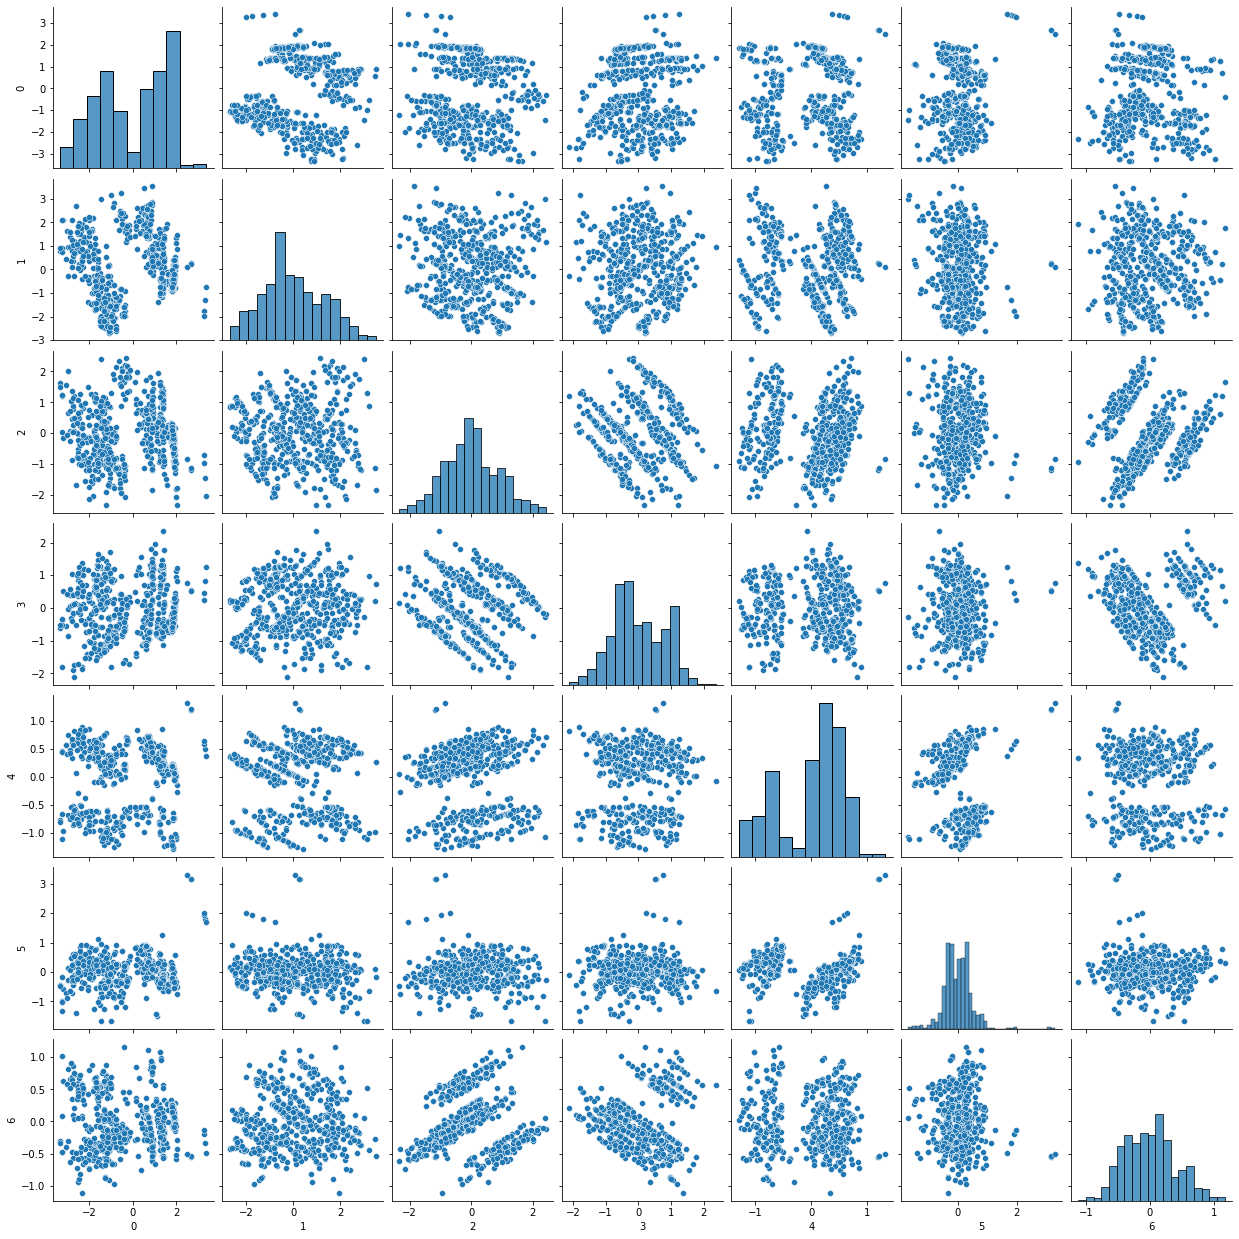

In [60]:
sns.pairplot(PCA_DF)             # check variables correlation

_____
_____

## `7. Modeling`:
- #### We will be applying some classification models including:
    1. LogisticRegression
    2. KNeighborsClassifier
    3. DecisionTreeClassifier
    4. RandomForestClassifier
    5. GradientBoostingClassifier
    6. Support Vector Machine (SVM)
    7. naive_bayes classifier (GaussianNB)
    8. SGDClassifier
    

In [61]:
## Train Test split:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(scaled_data, label_data, test_size = 0.2, random_state = 42)

### 1. LogisticRegression

Accuracy_score on train :  0.7758284600389863
Accuracy_score on test :  0.7286821705426356

roc_auc_score is on train :  0.7756953944368445
roc_auc score on test :  0.7269119769119768


 TN: 53 
 FP: 13 
 FN: 22 
 TP: 41
***********************************
Recall Accuracy:  0.6507936507936508
***********************************
Precision Accuracy:  0.7592592592592593
***********************************
f1 score:  0.7008547008547008
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

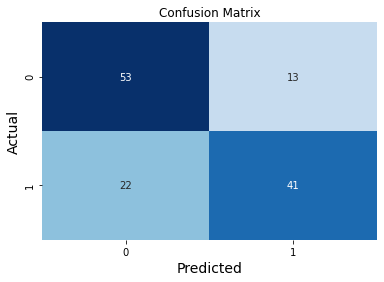

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix


LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pre = LR.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, LR.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'roc_auc_score is on train : ', roc_auc_score(y_train, LR.predict(X_train)) )
print( 'roc_auc score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')

### 2. KNeighborsClassifier

Accuracy_score on train :  0.7699805068226121
Accuracy_score on test :  0.7906976744186046

roc_auc_score is on train :  0.7699270405836753
roc_auc score on test :  0.7896825396825398


 TN: 55 
 FP: 11 
 FN: 16 
 TP: 47
***********************************
Recall Accuracy:  0.746031746031746
***********************************
Precision Accuracy:  0.8103448275862069
***********************************
f1 score:  0.7768595041322314
***********************************
The best Parameters is:  {'n_neighbors': 50}
***********************************
The best estimator is:  KNeighborsClassifier(n_neighbors=50)
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

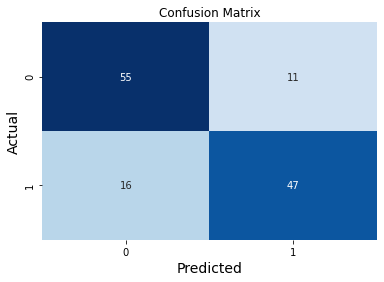

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


param_grid = {"n_neighbors": [3,5,10,20,50,75]}

KNN = KNeighborsClassifier()
grid_KNN_class= GridSearchCV(KNN, param_grid, cv=5, n_jobs=4)  # n_jobs= 4  --> means Use 4 cores for processing in parallel
grid_KNN_class.fit(X_train, y_train)
y_pre= grid_KNN_class.best_estimator_.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, grid_KNN_class.best_estimator_.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'roc_auc_score is on train : ', roc_auc_score(y_train, grid_KNN_class.best_estimator_.predict(X_train)) )
print( 'roc_auc score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)
print( 'The best Parameters is: ', grid_KNN_class.best_params_)
print('*******'*5)
print( 'The best estimator is: ', grid_KNN_class.best_estimator_)
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')

### 3. DecisionTreeClassifier

In [64]:
# Here i will make GridSearchCV in another way, but the same result as the first way:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

def gbm_grid_search(max_depth, min_samples, max_features):
    model = DecisionTreeClassifier(max_depth= max_depth,
                                   min_samples_split= min_samples,
                                   max_features= max_features)
    model.fit(X_train, y_train)
    y_pre= model.predict(X_test)
    
    return([max_depth, min_samples, max_features,
            accuracy_score(y_test, y_pre), roc_auc_score(y_test, y_pre), recall_score(y_test, y_pre),
            precision_score(y_test, y_pre), f1_score(y_test, y_pre), confusion_matrix(y_test, y_pre)])

    
max_depth_list = [4, 6, 8, 10, 12, 15, 20, 25, 30, None]
min_samples_list = [2, 4, 6, 8, 10, 12]
max_features_list = ['auto', 'sqrt', 'log2', None]
results_list = []

for max_depth in max_depth_list:
    for min_sample in min_samples_list:
        for max_feature in max_features_list:
            results_list.append(gbm_grid_search(max_depth, min_sample, max_feature))
      
    
results_df= pd.DataFrame(results_list, columns= ['Max_depth', 'Min_samples_split', 'Max_features', 'accuracy_score', 'roc_auc_score', 'recall_score', 'precision_score', 'f1_score', 'confusion_matrix'])
results_df.sort_values(by= ['accuracy_score'], ascending=False, inplace= True)
results_df.reset_index(inplace= True, drop= True)
results_df


,Max_depth,Min_samples_split,Max_features,accuracy_score,roc_auc_score,recall_score,precision_score,f1_score,confusion_matrix
0,4.0,4,auto,0.775194,0.774531,0.746032,0.783333,0.764228,"[[53, 13], [16, 47]]"
1,8.0,2,auto,0.767442,0.765512,0.682540,0.811321,0.741379,"[[56, 10], [20, 43]]"
2,6.0,12,None,0.759690,0.759019,0.730159,0.766667,0.747967,"[[52, 14], [17, 46]]"
3,4.0,6,sqrt,0.751938,0.748918,0.619048,0.829787,0.709091,"[[58, 8], [24, 39]]"
4,6.0,6,None,0.751938,0.751082,0.714286,0.762712,0.737705,"[[52, 14], [18, 45]]"
...,...,...,...,...,...,...,...,...,...
235,30.0,10,log2,0.620155,0.618687,0.555556,0.625000,0.588235,"[[45, 21], [28, 35]]"
236,8.0,2,sqrt,0.620155,0.619048,0.571429,0.620690,0.595041,"[[44, 22], [27, 36]]"
237,15.0,6,auto,0.612403,0.612193,0.603175,0.603175,0.603175,"[[41, 25], [25, 38]]"
238,NaN,12,sqrt,0.612403,0.612554,0.619048,0.600000,0.609375,"[[40, 26], [24, 39]]"


____
#### then the best acuracy is [ `0.787402` ]  which it's parameters is [ `Max_depth`= 8, `Min_samples_split`= 12, `Max_features`= None ]
#### then i need to see the `TN`, `TP`, `FN`, `FP` and `confusion_matrix figure` of the model of this parameters

 TN: 49 
 FP: 17 
 FN: 18 
 TP: 45
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

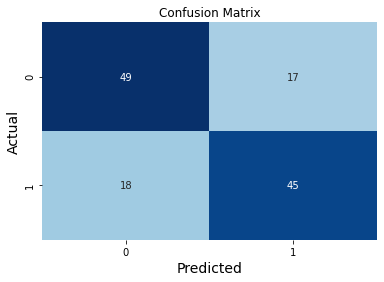

In [65]:
model = DecisionTreeClassifier(max_depth= 8, min_samples_split= 12, max_features= None)
model.fit(X_train, y_train)
y_pre= model.predict(X_test)

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)

## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')

### 4. RandomForestClassifier

Accuracy_score on train :  0.8538011695906432
Accuracy_score on test :  0.7674418604651163

roc_auc_score is on train :  0.8538531691746466
roc_auc score on test :  0.7658730158730158


 TN: 55 
 FP: 11 
 FN: 19 
 TP: 44
***********************************
Recall Accuracy:  0.6984126984126984
***********************************
Precision Accuracy:  0.8
***********************************
f1 score:  0.7457627118644068
***********************************
The best Parameters is:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 4}
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

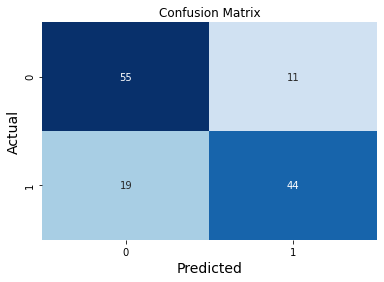

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


param_grid = {"max_depth": [4, 6, None],
              "max_features": ['sqrt'],
              "min_samples_split": range(2, 5)}

RF = RandomForestClassifier(n_estimators=100, random_state=1111)
grid_RF_class= GridSearchCV(RF, param_grid, cv=5, n_jobs=4)  # n_jobs= 4  --> means Use 4 cores for processing in parallel
grid_RF_class.fit(X_train, y_train)
y_pre= grid_RF_class.best_estimator_.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, grid_RF_class.best_estimator_.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'roc_auc_score is on train : ', roc_auc_score(y_train, grid_RF_class.best_estimator_.predict(X_train)) )
print( 'roc_auc score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)
print( 'The best Parameters is: ', grid_RF_class.best_params_)
print('*******'*5)

## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')

### 5. GradientBoostingClassifier

Accuracy_score on train :  0.9337231968810916
Accuracy_score on test :  0.7364341085271318

roc_auc_score is on train :  0.9338577291381669
roc_auc score on test :  0.7348484848484848


 TN: 53 
 FP: 13 
 FN: 21 
 TP: 42
***********************************
Recall Accuracy:  0.6666666666666666
***********************************
Precision Accuracy:  0.7636363636363637
***********************************
f1 score:  0.711864406779661
***********************************
The best Parameters is:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1}
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

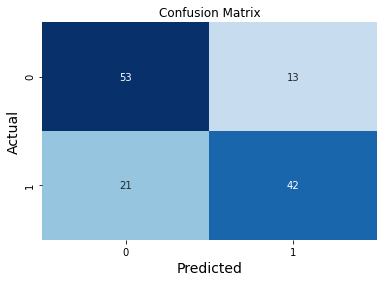

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


param_grid = {"learning_rate": [0.001, 0.01, 0.1],
              "subsample": [0.4, 1],
              "max_depth": [3, 6]}

GBoost = GradientBoostingClassifier()
grid_GBoost_class= GridSearchCV(GBoost, param_grid, cv=5, n_jobs=4)  # n_jobs= 4  --> means Use 4 cores for processing in parallel
grid_GBoost_class.fit(X_train, y_train)
y_pre= grid_GBoost_class.best_estimator_.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, grid_GBoost_class.best_estimator_.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'roc_auc_score is on train : ', roc_auc_score(y_train, grid_GBoost_class.best_estimator_.predict(X_train)) )
print( 'roc_auc score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)
print( 'The best Parameters is: ', grid_GBoost_class.best_params_)
print('*******'*5)

## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')

### 6. Support Vector Machine (SVM)

Accuracy_score on train :  0.8128654970760234
Accuracy_score on test :  0.7286821705426356

roc_auc_score on train :  0.8130414956680346
roc_auc_score on test :  0.7258297258297258


 TN: 56 
 FP: 10 
 FN: 25 
 TP: 38
***********************************
Recall Accuracy:  0.6031746031746031
***********************************
Precision Accuracy:  0.7916666666666666
***********************************
f1 score:  0.6846846846846846
***********************************
The best Parameters is:  {'C': 1, 'degree': 3, 'kernel': 'poly'}
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

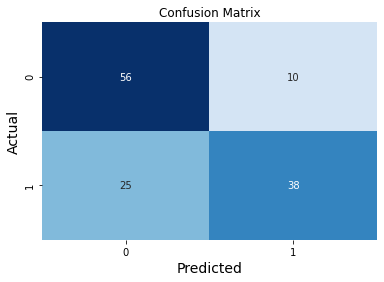

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

param_grid = {"kernel": ['rbf', 'linear', 'poly'],
              "C": [1, 2, 3],
              "degree": [3, 4, 6]}

svm_model = SVC(probability=True)        # default [ kernel='rbf' ]
grid_SVM_class= GridSearchCV(svm_model, param_grid, cv= 5, n_jobs= 4)
grid_SVM_class.fit(X_train, y_train)
y_pre = grid_SVM_class.best_estimator_.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, grid_SVM_class.best_estimator_.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'roc_auc_score on train : ', roc_auc_score(y_train, grid_SVM_class.best_estimator_.predict(X_train)) )
print( 'roc_auc_score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)
print( 'The best Parameters is: ', grid_SVM_class.best_params_)
print('*******'*5)

## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')


### 7. GaussianNB

Accuracy_score on train :  0.7699805068226121
Accuracy_score on test :  0.7751937984496124

roc_auc_score on train :  0.7699498404012768
roc_auc_score on test :  0.7734487734487735


 TN: 56 
 FP: 10 
 FN: 19 
 TP: 44
***********************************
Recall Accuracy:  0.6984126984126984
***********************************
Precision Accuracy:  0.8148148148148148
***********************************
f1 score:  0.7521367521367521
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

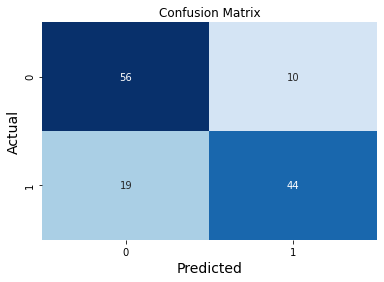

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix

NB = GaussianNB()        
NB.fit(X_train, y_train)
y_pre = NB.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, NB.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'roc_auc_score on train : ', roc_auc_score(y_train, NB.predict(X_train)) )
print( 'roc_auc_score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')


### 8. Gradient Descent ( SGDClassifier )

Accuracy_score on train :  0.732943469785575
Accuracy_score on test :  0.7054263565891473

roc_auc_score on train :  0.733561331509348
roc_auc_score on test :  0.7012987012987013


 TN: 58 
 FP: 8 
 FN: 30 
 TP: 33
***********************************
Recall Accuracy:  0.5238095238095238
***********************************
Precision Accuracy:  0.8048780487804879
***********************************
f1 score:  0.6346153846153846
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

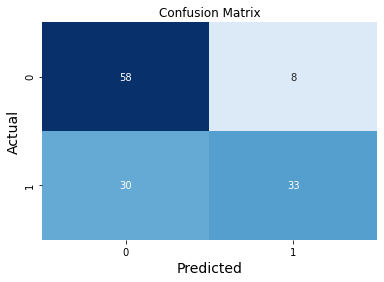

In [70]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix

SGD = SGDClassifier()        
SGD.fit(X_train, y_train)
y_pre = SGD.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, SGD.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'roc_auc_score on train : ', roc_auc_score(y_train, SGD.predict(X_train)) )
print( 'roc_auc_score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')


## `8. Results`

In [71]:
# print accuracy score for each model

print('Logistic Regression: ', '\t', accuracy_score(y_test, LR.predict(X_test)))
print('KNN: ', '\t\t\t', accuracy_score(y_test, grid_KNN_class.best_estimator_.predict(X_test)))
print('DecisionTree: ', '\t\t', accuracy_score(y_test, model.predict(X_test)))
print('RandomForest: ', '\t\t', accuracy_score(y_test, grid_RF_class.best_estimator_.predict(X_test)))
print('GradientBoosting: ', '\t', accuracy_score(y_test, grid_GBoost_class.best_estimator_.predict(X_test)))
print('SVM: ', '\t\t\t', accuracy_score(y_test, grid_SVM_class.best_estimator_.predict(X_test)))
print('Naive Bayes: ', '\t\t', accuracy_score(y_test, NB.predict(X_test)))
print('Gradient Decent: ', '\t', accuracy_score(y_test, SGD.predict(X_test)))

Logistic Regression:  	 0.7286821705426356
KNN:  			 0.7906976744186046
DecisionTree:  		 0.7286821705426356
RandomForest:  		 0.7674418604651163
GradientBoosting:  	 0.7364341085271318
SVM:  			 0.7286821705426356
Naive Bayes:  		 0.7751937984496124
Gradient Decent:  	 0.7054263565891473


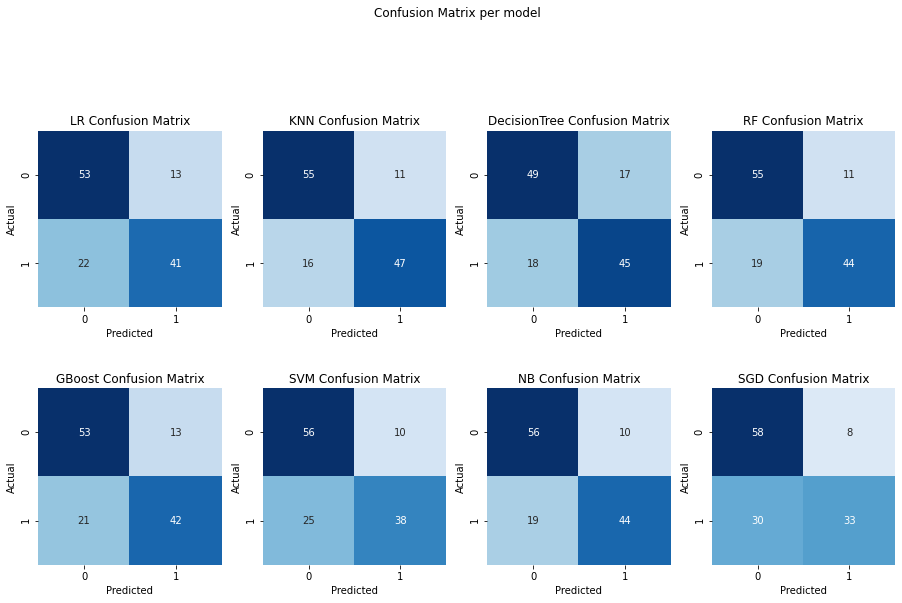

In [72]:
fig, axes= plt.subplots(2, 4, figsize= [14, 9])

fig.suptitle('Confusion Matrix per model ')
fig.tight_layout(pad=6, w_pad= True)

# plot Logistic Regression
p1= sns.heatmap(confusion_matrix(y_test, LR.predict(X_test)), ax=axes[0, 0], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p1.set_xlabel('Predicted', fontsize=10)
p1.set_ylabel('Actual', fontsize=10)
p1.set_title('LR Confusion Matrix', fontsize=12)

# plot KNN
p2= sns.heatmap(confusion_matrix(y_test, grid_KNN_class.best_estimator_.predict(X_test)), ax=axes[0, 1], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p2.set_xlabel('Predicted', fontsize=10)
p2.set_ylabel('Actual', fontsize=10)
p2.set_title('KNN Confusion Matrix', fontsize=12)

# plot DecisionTree
p3= sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), ax=axes[0, 2], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p3.set_xlabel('Predicted', fontsize=10)
p3.set_ylabel('Actual', fontsize=10)
p3.set_title('DecisionTree Confusion Matrix', fontsize=12)

# plot RandomForest 
p4= sns.heatmap(confusion_matrix(y_test, grid_RF_class.best_estimator_.predict(X_test)), ax=axes[0, 3], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p4.set_xlabel('Predicted', fontsize=10)
p4.set_ylabel('Actual', fontsize=10)
p4.set_title('RF Confusion Matrix', fontsize=12)

# plot GradientBoosting
p5= sns.heatmap(confusion_matrix(y_test, grid_GBoost_class.best_estimator_.predict(X_test)), ax=axes[1, 0], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p5.set_xlabel('Predicted', fontsize=10)
p5.set_ylabel('Actual', fontsize=10)
p5.set_title('GBoost Confusion Matrix', fontsize=12)

# plot SVM
p6= sns.heatmap(confusion_matrix(y_test, grid_SVM_class.best_estimator_.predict(X_test)), ax=axes[1, 1], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p6.set_xlabel('Predicted', fontsize=10)
p6.set_ylabel('Actual', fontsize=10)
p6.set_title('SVM Confusion Matrix', fontsize=12)

# plot Naive Bayes
p7= sns.heatmap(confusion_matrix(y_test, NB.predict(X_test)), ax=axes[1, 2], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p7.set_xlabel('Predicted', fontsize=10)
p7.set_ylabel('Actual', fontsize=10)
p7.set_title('NB Confusion Matrix', fontsize=12)

# plot Gradient Decent
p8= sns.heatmap(confusion_matrix(y_test, SGD.predict(X_test)), ax=axes[1, 3], fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
p8.set_xlabel('Predicted', fontsize=10)
p8.set_ylabel('Actual', fontsize=10)
p8.set_title('SGD Confusion Matrix', fontsize=12)

plt.show()

________
________
#### After comparing the eight models, as shown, the `KNeighborsClassifier` is the most model with the `more score` and `least overfitting`,
#### And the most model has the best `confusion matrix` (Which `TN` & `TP`) is very high more than `FN` & `FP`

Accuracy_score on train :  0.7699805068226121
Accuracy_score on test :  0.7906976744186046

roc_auc_score is on train :  0.7699270405836753
roc_auc score on test :  0.7896825396825398


 TN: 55 
 FP: 11 
 FN: 16 
 TP: 47
***********************************
Recall Accuracy:  0.746031746031746
***********************************
Precision Accuracy:  0.8103448275862069
***********************************
f1 score:  0.7768595041322314
***********************************
The best Parameters is:  {'n_neighbors': 50}
***********************************
The best estimator is:  KNeighborsClassifier(n_neighbors=50)
***********************************


Text(0.5, 1.0, 'Confusion Matrix')

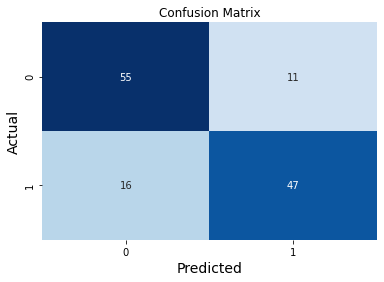

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


param_grid = {"n_neighbors": [3,5,10,20,50,75]}

KNN = KNeighborsClassifier()
grid_KNN_class= GridSearchCV(KNN, param_grid, cv=5, n_jobs=4)  # n_jobs= 4  --> means Use 4 cores for processing in parallel
grid_KNN_class.fit(X_train, y_train)
y_pre= grid_KNN_class.best_estimator_.predict(X_test)

print( 'Accuracy_score on train : ', accuracy_score(y_train, grid_KNN_class.best_estimator_.predict(X_train)) )
print( 'Accuracy_score on test : ', accuracy_score(y_test, y_pre) )
print('')

print( 'roc_auc_score is on train : ', roc_auc_score(y_train, grid_KNN_class.best_estimator_.predict(X_train)) )
print( 'roc_auc score on test : ', roc_auc_score(y_test, y_pre) )
print('')
print('')

# Precision & Recall  Accuracies for test only:
tn, fp, fn, tp = confusion_matrix(y_test, y_pre).ravel()
print(f' TN: {tn} \n FP: {fp} \n FN: {fn} \n TP: {tp}')
print('*******'*5)
print( 'Recall Accuracy: ', recall_score(y_test, y_pre) )
print('*******'*5)
print( 'Precision Accuracy: ', precision_score(y_test, y_pre) )
print('*******'*5)
print( 'f1 score: ', f1_score(y_test, y_pre) )
print('*******'*5)
print( 'The best Parameters is: ', grid_KNN_class.best_params_)
print('*******'*5)
print( 'The best estimator is: ', grid_KNN_class.best_estimator_)
print('*******'*5)


## Confusion Matrix  for test only:
confus_model = confusion_matrix(y_test, y_pre)

# plot it
sns.heatmap(confus_model, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix')

In [74]:
## try VotingClassifier
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier([ ('LR', LogisticRegression()),
                            ('KNN', grid_KNN_class.best_estimator_),
                            ('DT', DecisionTreeClassifier(max_depth= 6,
                                                          min_samples_split= 4,
                                                          max_features= None)),
                            ('RF', grid_RF_class.best_estimator_),
                            ('GBoost', GradientBoostingClassifier()),
                            ('SVC', grid_SVM_class.best_estimator_)],
                            voting='soft')

voting.fit(X_train, y_train)
y_pred= voting.predict(X_test)

score = accuracy_score(y_test, y_pred)
print("soft Voting Score % d" % score)

soft Voting Score  0
